# Business-Understanding

As a Data Scientist, your task is to develop a predictive model to identify purchase intent for a segment of our online users. The goal is to accurately predict which users are likely to make a purchase during their web session, enabling the business to target potential buyers more effectively.

# Data-Understanding

The data is from [Kaggle](https://www.kaggle.com/competitions/22122shop/data)

There are 18 variables with 10 quantitative and 7 categorical input features, 500K observations (one row or web session per online user) in a tabular format with the first 50K rows missing the Rev revenue flag (1 for purchase intent and 0 otherwise). The data was collected for the period of 1 year.

Features description (from the dataset authors):

1. `Administrative (Adm)`, `Informational (Inf)`,` Product Related (Prd)`: 
    - counts of different page types viewed by the user in that session. Values are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
2. `Administrative Duration (AdmDur)`, `Informational Duration (InfDur)`, and `Product Related Duration (PrdDur)`: 
    - total time spent on the page of the specified type.
3. `Bounce Rate (BncRt):` 
    - %visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. Measured by Google Analytics
4. `Exit Rate (ExtRt)`: 
    - %visitors that were the last in the session. Calculated as for all pageviews to the page. Measured by Google Analytics.
5. `Page Value (PgVal)`: 
    - average value for a web page that the user visited before completing an e-commerce transaction.
6. `Special Day (SpclDay)`: 
    - closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine's day, this value takes a nonzero value between Feb 2 and Feb 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on Feb 8.
7. `Operating system (OS)` of the user's PC
8. `Browser (Bsr)`: web user's web browser
9. `Region (Rgn) `of the web user
10. `Traffic type (TfcTp)`: TBD
11. `Visitor type (VstTp)`: Type of visitor
12. `Weekend (Wknd)`: whether the page view event took place on weekend
13. `Month of the year (Mo)`: the month of the page view event

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
sns.set_style('darkgrid')

In [50]:
df = pd.read_csv('XY_Shop.csv')
df

,Adm,AdmDur,Inf,InfDur,Prd,PrdDur,BncRt,ExtRt,PgVal,SpclDay,Mo,OS,Bsr,Rgn,TfcTp,VstTp,Wkd,Rev
0,0,0.00,0,0.00,18,132.99,0.038211,0.054523,0.000000,0.0,4,3,1,1,2,0,1,NaN
1,1,0.00,0,0.00,37,1150.20,0.001245,0.030321,0.000000,0.0,11,2,2,4,2,0,1,NaN
2,6,191.98,0,0.00,38,1266.78,0.004742,0.019551,17.816864,0.0,10,2,3,1,3,0,0,NaN
3,3,263.68,0,0.00,24,749.14,0.004474,0.024079,14.578547,0.0,7,2,2,2,1,0,1,NaN
4,0,0.00,0,0.00,3,136.41,0.000000,0.066300,0.000000,0.0,12,1,1,3,3,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,14,262.46,0,0.00,170,3967.02,0.003314,0.015669,2.904034,0.0,12,2,2,4,2,0,0,0.0
499996,0,0.00,0,0.00,7,295.57,0.000000,0.000000,0.000000,0.0,9,1,5,4,3,0,0,0.0
499997,6,134.64,3,92.28,30,888.50,0.000000,0.003452,30.172020,0.0,11,2,2,1,4,0,0,0.0
499998,0,0.00,0,0.00,27,1185.14,0.000000,0.001593,0.000000,0.0,5,2,2,2,3,0,1,0.0


# EDA

## Data-Cleaning

We first split the data to remove the rows with missing values in the rev column.

In [51]:
# checking the missing values
df.isna().sum().sum()

50000

In [52]:
missing_rev = df.loc[df.Rev.isna()]
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450000 entries, 50000 to 499999
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Adm      450000 non-null  int64  
 1   AdmDur   450000 non-null  float64
 2   Inf      450000 non-null  int64  
 3   InfDur   450000 non-null  float64
 4   Prd      450000 non-null  int64  
 5   PrdDur   450000 non-null  float64
 6   BncRt    450000 non-null  float64
 7   ExtRt    450000 non-null  float64
 8   PgVal    450000 non-null  float64
 9   SpclDay  450000 non-null  float64
 10  Mo       450000 non-null  int64  
 11  OS       450000 non-null  int64  
 12  Bsr      450000 non-null  int64  
 13  Rgn      450000 non-null  int64  
 14  TfcTp    450000 non-null  int64  
 15  VstTp    450000 non-null  int64  
 16  Wkd      450000 non-null  int64  
 17  Rev      450000 non-null  float64
dtypes: float64(8), int64(10)
memory usage: 65.2 MB


Now we check for duplicates

In [53]:
df.duplicated().sum()

87

In [54]:
df.drop_duplicates(inplace=True)
df

,Adm,AdmDur,Inf,InfDur,Prd,PrdDur,BncRt,ExtRt,PgVal,SpclDay,Mo,OS,Bsr,Rgn,TfcTp,VstTp,Wkd,Rev
50000,0,0.00,0,0.00,1,0.00,0.157489,0.115168,0.000000,0.0,12,2,2,1,9,0,0,0.0
50001,7,116.19,0,0.00,79,2683.58,0.000000,0.001910,0.000000,0.0,4,2,3,2,2,1,0,0.0
50002,6,233.07,0,0.00,8,171.08,0.033427,0.062316,0.000000,0.0,12,2,2,2,1,0,0,0.0
50003,0,0.00,0,0.00,5,0.00,0.140943,0.160706,0.000000,0.0,6,2,2,3,5,0,0,0.0
50004,0,0.00,0,0.00,6,112.57,0.035324,0.021440,0.000000,0.0,10,2,2,4,7,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,14,262.46,0,0.00,170,3967.02,0.003314,0.015669,2.904034,0.0,12,2,2,4,2,0,0,0.0
499996,0,0.00,0,0.00,7,295.57,0.000000,0.000000,0.000000,0.0,9,1,5,4,3,0,0,0.0
499997,6,134.64,3,92.28,30,888.50,0.000000,0.003452,30.172020,0.0,11,2,2,1,4,0,0,0.0
499998,0,0.00,0,0.00,27,1185.14,0.000000,0.001593,0.000000,0.0,5,2,2,2,3,0,1,0.0


## Page Visits

Adm     2
Inf     0
Prd    30
dtype: int32


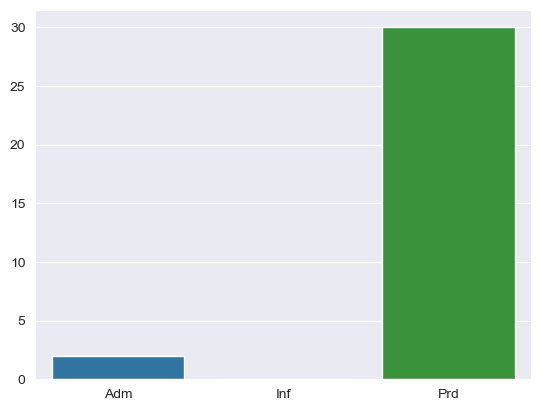

In [55]:
page_visits = df[['Adm', 'Inf', 'Prd']]

# plotting the average page visits per session
avg_visits = page_visits.mean().astype(int)
print(avg_visits)

sns.barplot(x=avg_visits.index, y=avg_visits);

- Products page averages the most visits per session with about 30 per session.
- There is a contrast in page visits for the Administrative pages with an average of 0 visits per session.
- Informational pages averages no visits per session.

AdmDur      76.870743
InfDur      31.830116
PrdDur    1165.230601
dtype: float64


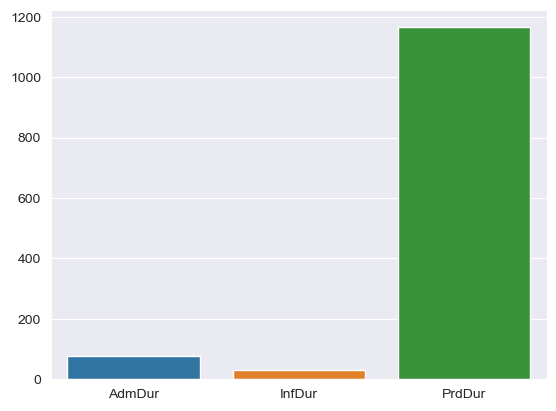

In [56]:
page_time = df[['AdmDur', 'InfDur','PrdDur']]
avg_page_time = page_time.mean()
print(avg_page_time)

# plotting
sns.barplot(x=avg_page_time.index, y=avg_page_time);

Same case for the duration, most time is spent on the product pages compared to the administrative and informational pages.

## Bounce and Exit Rates

In [57]:
bounce_exit = df[['BncRt', 'ExtRt']]
bounce_exit.mean()

BncRt    0.018359
ExtRt    0.036841
dtype: float64

- Bounce rate is relatively low at around 2%.
- Same case for Exit rate at around 4%

## Purchases on different times of the year

In [58]:
monthly_rev = df.groupby('Mo')['Rev'].sum().reset_index()
monthly_rev

,Mo,Rev
0,1,252.0
1,2,4388.0
2,3,4440.0
3,4,11889.0
4,5,8223.0
5,6,9561.0
6,7,3218.0
7,8,3813.0
8,9,4389.0
9,10,14331.0


we now convert the month numbers to the actual names of the months then plot.


In [ ]:
import calendar

# Transforming the month column
monthly_rev['Mo'] = monthly_rev.Mo.map(
    lambda x: calendar.month_name[int(x)]
)

c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


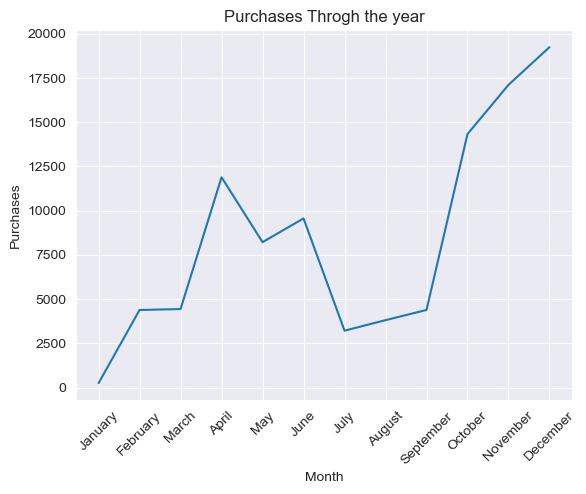

In [67]:
# plotting the distribution
sns.lineplot(
    monthly_rev,
    x='Mo', 
    y='Rev'
)
plt.xlabel('Month')
plt.ylabel('Purchases')
plt.title('Purchases Throgh the year')
plt.xticks(rotation=45);

- Purchases tend to peak in October and continue to rise steadily, reaching their highest levels by the end of the year. This can be contributed by special events such as holiday shopping and special promotions among others.
- Purchases tend to be lowest in January, gradually rise to a peak in April, though not as high as the peak in October, and then steadily decline afterward.
- This pattern reflects typical consumer behavior influenced by seasonal events, financial cycles, and marketing strategies.

## Purchases on special days

Investigating how closeness to the special days influences the purchases.

In [76]:
special_purchases = df.loc[df.SpclDay > 0].groupby(
    'SpclDay'
)['Rev'].sum().reset_index()
special_purchases.columns = ['Closeness', 'Purchases']

c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


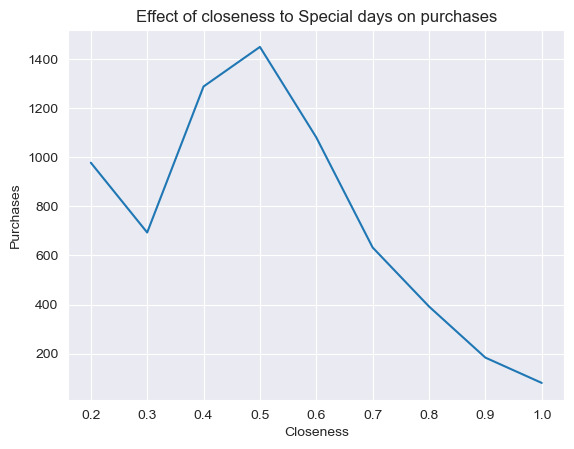

In [77]:
# Plotting the trend
sns.lineplot(
    special_purchases,
    x='Closeness',
    y='Purchases'
)

plt.title('Effect of closeness to Special days on purchases');


Purchases tend to increase when the closeness value is around the midpoint, indicating a balanced anticipation of the special day. As the date of the special event approaches, the likelihood of making a purchase gradually decreases. Conversely, when the event is farther away, purchase activity is relatively lower but starts to rise as the date nears, peaking at the midpoint before gradually declining again.

## Purchases on weekends

Effect of weekends on purchases

In [92]:
df.Wkd.value_counts()

Wkd
0    321053
1    128860
Name: count, dtype: int64

   Wkd       Rev
0    0  0.171043
1    1  0.356542


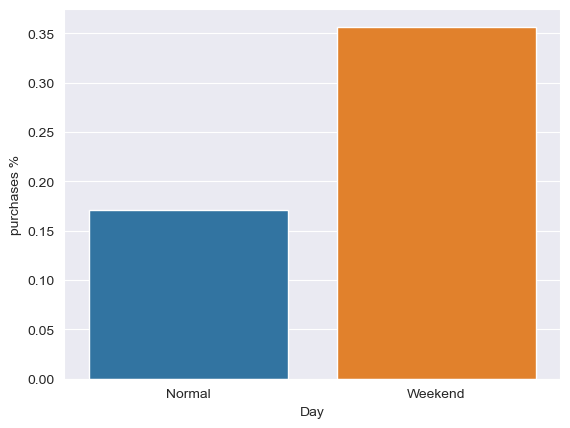

In [100]:
weekend_purchases = df.groupby('Wkd')['Rev'].mean().reset_index()

# plotting
sns.barplot(
    weekend_purchases,
    x='Wkd',
    y='Rev'
)
print(weekend_purchases)

plt.xticks([0, 1], labels=['Normal', 'Weekend'])
plt.xlabel('Day')
plt.ylabel('purchases %');

Purchases occur more on weekends than on normal days as indicated by the chart. About 35% of the visits in the weekends result to purchases compared to normal days at 17%.

## Page value

Investigating the effect of page value to the purchases.

In [79]:
df[['PgVal']].describe()

,PgVal
count,449913.000000
mean,5.500630
std,16.525529
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,360.740676


The page value ranges from 0 to 360. We bin the range to different values to get the  purchases as value increases.

C:\Users\mutis\AppData\Local\Temp\ipykernel_6932\934730105.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value_cat_purchases = value_df.groupby('val_cat')['Rev'].mean().reset_index()
c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


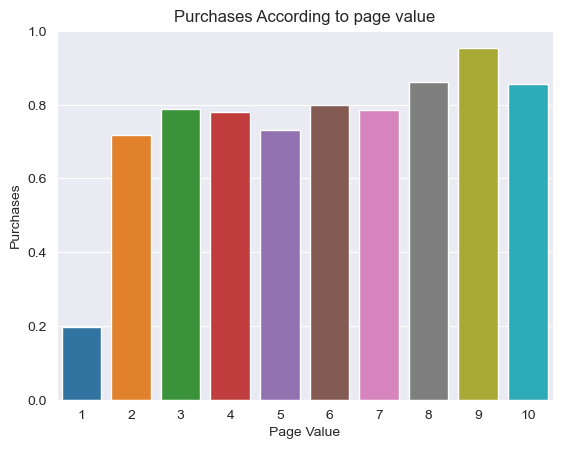

In [90]:
value_df = df.copy()
# binning the page value to 10 categories
value_df['val_cat'] = pd.cut(df['PgVal'], bins=10, labels=np.arange(1, 11))

# get the percentage of purchases
value_cat_purchases = value_df.groupby('val_cat')['Rev'].mean().reset_index()

# plotting
sns.barplot(
    value_cat_purchases,
    x='val_cat',
    y='Rev',
)

plt.title('Purchases According to page value')
plt.xlabel('Page Value')
plt.ylabel('Purchases');

There is an upward trend as the page value increases, more purchases are made.

# Data preparation

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449913 entries, 50000 to 499999
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Adm      449913 non-null  int64  
 1   AdmDur   449913 non-null  float64
 2   Inf      449913 non-null  int64  
 3   InfDur   449913 non-null  float64
 4   Prd      449913 non-null  int64  
 5   PrdDur   449913 non-null  float64
 6   BncRt    449913 non-null  float64
 7   ExtRt    449913 non-null  float64
 8   PgVal    449913 non-null  float64
 9   SpclDay  449913 non-null  float64
 10  Mo       449913 non-null  int64  
 11  OS       449913 non-null  int64  
 12  Bsr      449913 non-null  int64  
 13  Rgn      449913 non-null  int64  
 14  TfcTp    449913 non-null  int64  
 15  VstTp    449913 non-null  int64  
 16  Wkd      449913 non-null  int64  
 17  Rev      449913 non-null  float64
dtypes: float64(8), int64(10)
memory usage: 81.3 MB


most columns are either in float64 format or int64 but some of them are categorical. So we convert the categorical columns to object.

In [106]:
df[['Mo', 'OS', 'Bsr', 'Rgn', 'TfcTp', 'VstTp']] = (
    df[['Mo', 'OS', 'Bsr', 'Rgn', 'TfcTp', 'VstTp']].astype('object')
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449913 entries, 50000 to 499999
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Adm      449913 non-null  int64  
 1   AdmDur   449913 non-null  float64
 2   Inf      449913 non-null  int64  
 3   InfDur   449913 non-null  float64
 4   Prd      449913 non-null  int64  
 5   PrdDur   449913 non-null  float64
 6   BncRt    449913 non-null  float64
 7   ExtRt    449913 non-null  float64
 8   PgVal    449913 non-null  float64
 9   SpclDay  449913 non-null  float64
 10  Mo       449913 non-null  object 
 11  OS       449913 non-null  object 
 12  Bsr      449913 non-null  object 
 13  Rgn      449913 non-null  object 
 14  TfcTp    449913 non-null  object 
 15  VstTp    449913 non-null  object 
 16  Wkd      449913 non-null  int64  
 17  Rev      449913 non-null  float64
dtypes: float64(8), int64(4), object(6)
memory usage: 81.3+ MB


now our data is in the correct data types.

# Modelling

We first start by spitting the data to the train and test sets.

## Preprocessing

In [110]:
# importing modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [111]:
# the seed for random generators
random_state = 20

In [112]:
X = df.drop('Rev', axis=1)
y = df['Rev']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=random_state)

We now proceed to create dummy variables for the categorical columns.

In [114]:
# creating dummy variables for categorical
X_train_dummy = pd.get_dummies(X_train.select_dtypes('object'),
                               drop_first=True,
                               dtype=int)
X_test_dummy = pd.get_dummies(X_test.select_dtypes('object'),
                              drop_first=True,
                              dtype=int)

We then scale the numerical columns to put them on the same scale.

In [121]:
scaler = StandardScaler()
numeric_training = X_train.select_dtypes(exclude='object')
numeric_test = X_test.select_dtypes(exclude='object')
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(numeric_training),
    columns=numeric_training.columns,
    index=numeric_training.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(numeric_test),
    columns=numeric_test.columns,
    index=numeric_test.index
)

In [123]:
# combining the dataframes to one
X_train_preprocessed = pd.concat(
    [X_train_scaled, X_train_dummy],
    axis=1
)

X_test_preprocessed = pd.concat(
    [X_test_scaled, X_test_dummy],
    axis=1
)

X_train_preprocessed

,Adm,AdmDur,Inf,InfDur,Prd,PrdDur,BncRt,ExtRt,PgVal,SpclDay,...,TfcTp_2,TfcTp_3,TfcTp_4,TfcTp_5,TfcTp_6,TfcTp_7,TfcTp_8,TfcTp_9,VstTp_1,VstTp_2
199738,-0.734052,-0.485583,-0.412760,-0.260327,-0.208215,-0.229697,-0.487376,-0.523353,-0.332714,-0.310491,...,0,1,0,0,0,0,0,0,0,0
52555,0.300392,-0.258402,1.276139,-0.129599,1.118539,1.713617,0.020644,-0.272948,-0.332714,-0.310491,...,1,0,0,0,0,0,0,0,0,0
311137,-0.734052,-0.485583,-0.412760,-0.260327,-0.692990,-0.511456,-0.487376,-0.129734,-0.332714,-0.310491,...,1,0,0,0,0,0,0,0,0,0
325494,0.645206,0.136276,-0.412760,-0.260327,-0.514389,-0.621169,1.246706,1.212630,-0.332714,-0.310491,...,0,1,0,0,0,0,0,0,0,0
379185,0.300392,-0.366087,-0.412760,-0.260327,-0.565418,-0.463498,-0.487376,-0.785660,-0.332714,-0.310491,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81962,-0.734052,-0.485583,-0.412760,-0.260327,-0.361302,-0.520394,-0.487376,-0.850491,-0.332714,-0.310491,...,0,0,0,0,0,0,1,0,0,0
270085,-0.734052,-0.485583,-0.412760,-0.260327,-0.667476,-0.630941,-0.487376,1.268036,-0.332714,-0.310491,...,1,0,0,0,0,0,0,0,0,0
335966,0.300392,0.103875,-0.412760,-0.260327,-0.744019,-0.654740,-0.487376,0.144580,-0.332714,-0.310491,...,1,0,0,0,0,0,0,0,1,0
87136,1.334836,0.706913,-0.412760,-0.260327,-0.590932,-0.318124,0.064870,-0.188867,-0.332714,-0.310491,...,1,0,0,0,0,0,0,0,0,0


## 1. Baseline model

For our case we first fit a Logistic regression model

In [127]:
y_train.value_counts(normalize=True)

Rev
0.0    0.775805
1.0    0.224195
Name: proportion, dtype: float64

There is class imbalance in the target variable with about 78% of the sessions leading to no purchases and other 22% to purchases.

We first fit a baseline model with the data as is.


In [131]:
baseline_model = LogisticRegression(random_state=random_state, solver='liblinear')
baseline_model.fit(X_train_preprocessed, y_train)

LogisticRegression(random_state=20, solver='liblinear')

### Evaluation of the baseline model

We use the log loss to measure the performance of the model. We measure both log loss in the performance of the model on train data and also use cross validation and get the log loss.

In [134]:
# importing the modules
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

# function for validation
def get_train_val_loss(model, X, y):
    """calculates the validation log loss and the train log loss
    Args:
        model: the model
        X: the model features for train data
        y: the target in the train data
    Returns:
        train_loss: the log loss of the training data
        val_loss: validation log loss
    """
    y_pred = model.decision_function(X)
    train_loss = log_loss(y, y_pred )
    
    # use cross validation
    val_scores = cross_val_score(model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring='neg_log_loss')
    val_loss = -val_scores.mean()
    return train_loss, val_loss

In [136]:
# Get the log loss for train and validation
baseline_train_loss, baseline_validation_loss = get_train_val_loss(
    baseline_model,
    X_train_preprocessed,
    y_train
)

print('Baseline model train log loss: ', baseline_train_loss)
print('Baseline_model validation log loss: ', baseline_validation_loss)

Baseline model train log loss:  6.4909192012304135
Baseline_model validation log loss:  0.4416013461857381


This model performs better in the validation data, but this could mean underfitting due to the difference in the log loss between train and validation data performance.

## 2. Fix class imbalance

There is class imbalance in the targer with about 78% for one class and 22% for the other.

We use SMOTE oversampling to fix this.

In [142]:
from imblearn.over_sampling import SMOTE

# initialize smote
sm = SMOTE(random_state=random_state)

# oversample with smote
X_train_oversampled, y_train_oversampled = sm.fit_resample(
    X_train_preprocessed,
    y_train
)

# fit new model
oversampled_model = LogisticRegression(random_state=random_state,
                                       solver='liblinear')

oversampled_model.fit(X_train_oversampled, y_train_oversampled)

# get log loss
ovesampled_train_loss, oversampled_val_loss = get_train_val_loss(oversampled_model,
                                                                 X_train_oversampled,
                                                                 y_train_oversampled)
print('Oversampled model train log loss:', ovesampled_train_loss)
print('Oversampled model val log loss:', oversampled_val_loss)

Oversampled model train log loss: 6.873874228343664
Oversampled model val log loss: 0.5410221662606414


In [158]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import make_scorer

neg_log_loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

def custom_cross_val_score(estimator, X, y):
    # Create a list to hold the scores from each fold
    kfold_train_scores = np.ndarray(5)
    kfold_val_scores = np.ndarray(5)

    # Instantiate a splitter object and loop over its result
    kfold = StratifiedKFold(n_splits=5)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        # Extract train and validation subsets using the provided indices
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]

        # Instantiate StandardScaler
        scaler = StandardScaler()
        # Fit and transform X_t
        X_t_scaled = scaler.fit_transform(X_t)
        # Transform X_val
        X_val_scaled = scaler.transform(X_val)

        # Instantiate SMOTE with random_state=42 and sampling_strategy=0.28
        sm = SMOTE(random_state=42, sampling_strategy='auto')
        # Fit and transform X_t_scaled and y_t using sm
        X_t_oversampled, y_t_oversampled = sm.fit_resample(X_t_scaled, y_t)

        # Clone the provided model and fit it on the train subset
        temp_model = clone(estimator)
        temp_model.fit(X_t_oversampled, y_t_oversampled)

        # Evaluate the provided model on the train and validation subsets
        neg_log_loss_score_train = neg_log_loss(
            temp_model, X_t_oversampled, y_t_oversampled)
        neg_log_loss_score_val = neg_log_loss(temp_model, X_val_scaled, y_val)
        kfold_train_scores[fold] = neg_log_loss_score_train
        kfold_val_scores[fold] = neg_log_loss_score_val

    return kfold_train_scores, kfold_val_scores

This model performs worse than the baseline model. Lets try to reduce the regularization.

## 3. Less regularization

In [159]:
less_reg_model = LogisticRegression(solver='liblinear',
                                    random_state=random_state,
                                    C=1e6)
# fitting model
less_reg_model.fit(X_train_oversampled, y_train_oversampled)

# log loss
# less_reg_train_loss, less_reg_val_loss = get_train_val_loss(less_reg_model,
#                                                             X_train_oversampled,
#                                                             y_train_oversampled
#                                                             )

less_reg_train_loss, less_reg_val_loss = custom_cross_val_score(less_reg_model,
                                                            X_train,
                                                            y_train
                                                            )
print('Less regularization model log loss on train data:', less_reg_train_loss)
print('Less Regularization model log loss on validation:', less_reg_val_loss)

Less regularization model log loss on train data: [-0.55806728 -0.55811595 -0.55842037 -0.55776477 -0.55793691]
Less Regularization model log loss on validation: [-0.56572202 -0.56735841 -0.5663552  -0.56531243 -0.56510882]


There is a small improvement on performance in the validation data but still , the model is worse than the baseline model. We can try changing the penalty to l1.

## 4. L1 regularization

In [148]:
l1_model = LogisticRegression(solver='saga',
                              random_state=random_state,
                              penalty='l1')

l1_model.fit(X_train_oversampled, y_train_oversampled)

# log loss
l1_train_loss, l1_val_loss = get_train_val_loss(l1_model,
                                                X_train_oversampled,
                                                y_train_oversampled
                                                )

print('Less regularization model log loss on train data:', l1_train_loss)
print('Less Regularization model log loss on validation:', l1_val_loss)

Less regularization model log loss on train data: 6.875125254154911
Less Regularization model log loss on validation: 0.5410212400982571


There is a slight improvement in this model. Lest try other Regularization method and compare.

## 5. Elasticnet regularization

In [151]:
elasticnet_model = LogisticRegression(solver='saga',
                                      random_state=random_state,
                                      penalty='elasticnet',
                                      l1_ratio=.5)

elasticnet_model.fit(X_train_oversampled, y_train_oversampled)

# log loss
elasticnet_train_loss, elasticnet_val_loss = get_train_val_loss(
    elasticnet_model,
    X_train_oversampled,
    y_train_oversampled
)

print('Elasticnet model log loss on train data:', elasticnet_train_loss)
print('Elasticnet model log loss on validation:', elasticnet_val_loss)

Less regularization model log loss on train data: 6.87424822485259
Less Regularization model log loss on validation: 0.5410212077747003


This is slightly better than the l1 model but all this models are performing worse than the baseline model.
lets try reducing the regularization and increasing iterations